Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

CONEXIÓN CON MYSQL WORKBENCH

In [ ]:
# pip install mysql-connector-python - Realizado desde Command
#

import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(host='localhost',
                                         database='script4_transactions',
                                         user='root',
                                         password='Calabozo1605*')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)

#Cerrar la Base de Datos
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

NIVEL 1 - EXERCICI 1

In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def crea_conexion_mysql():
    try:
        connection = mysql.connector.connect(host='localhost',
                                            database='script4_transactions',
                                            user='root',
                                            password='Calabozo1605*')
        return connection
    except mysql.connector.Error as e:
        print("Error reading data from MySQL table", e)
        return None
    
def obtener_tablas(connection):
#Obtiene la lista de tablas de la base de datos.
    sql_select_Query = "show tables"
    cursor = connection.cursor(dictionary=True, buffered=True)
    cursor.execute(sql_select_Query)
       
    # Se almacenan los valores en una lista
    tabla_nombre_tablas = []
    for fila in cursor.fetchall():
        tabla_nombre_tablas.append(fila['Tables_in_script4_transactions'])
    cursor.close()
    print(tabla_nombre_tablas)
    return tabla_nombre_tablas

def cargar_datos_en_diccionario(connection, tabla_nombre_tablas):
    data_dict_bd = {}

    for tabla in tabla_nombre_tablas:
        sql_select_Query1 = f"select * from {tabla}"
        df = pd.read_sql(sql_select_Query1,connection)
        data_dict_bd[tabla] = df

    return data_dict_bd

# ------------- PROGRAMA PRINCIPAL ------------------

conexion = crea_conexion_mysql()
if conexion:
    tablas = obtener_tablas(conexion)                           # Se obtiene los nombfres de las tablas a ser caragadas
    data_dict = cargar_datos_en_diccionario(conexion, tablas)   # Se cargan los datos en cada tabla

print(data_dict)

# Se hgace una copia de los dataframe para trabajarlos posteriormente.
datosdf_companies = pd.DataFrame(data_dict["companies"])
datosdf_transactions = pd.DataFrame(data_dict["transactions"])
datosdf_detalle_transacciones = pd.DataFrame(data_dict["detalle_transacciones"])
datosdf_products = pd.DataFrame(data_dict["products"]) 
datosdf_users = pd.DataFrame(data_dict["users"]) 
datosdf_credit_cards = pd.DataFrame(data_dict["credit_cards"])
datosdf_cestado_tarjetas = pd.DataFrame(data_dict["estado_tarjetas"])

# ------------- FIN PROGRAMA PRINCIPAL ------------------

VISUALIZAR UNA VARIABLE NUMERICA

In [ ]:
#============== EJERCICIO 1 ====================  
datosdf_products = pd.DataFrame(data_dict["products"])   
datosdf_products["price"] = datosdf_products["price"].str.replace("$", "", regex=False).astype('float64')
nuevos_datos = datosdf_products["price"] 
nuevos_datos.plot.box(patch_artist = True, showmeans = True, showfliers = True)
#nuevos_datos.plot.hist(bins= 20)  Se puede representar también con un histograma
plt.title("Visualizar UNA Variable Numérica")
print(datosdf_products["price"].describe())

DOS VARFIABLES NUMÉRICAS

In [ ]:
#============== EJERCICIO 2  - Dos Numéricas ==================== 
import seaborn as sns

datosdf_products = pd.DataFrame(data_dict["products"])   
datosdf_products["price"] = datosdf_products["price"].str.replace("$", "", regex=False).astype('float64')

nuevos_datos = datosdf_products["price"] 

sns.lmplot(
    data=datosdf_products,
    x="weight", y="price"
)
plt.title("Dos Variables numéricas Weight y Price")
plt.show()


In [ ]:
#Visualizar dos variables
datosdf = pd.DataFrame(data_dict["companies"])  
#datosdf.groupby(["country"])["company_id"].count().plot.pie() 
datosdf.groupby(["country"])["company_id"].count().plot.bar()
plt.title("Cantidad de empresas por país")
plt.xlabel("País")
plt.ylabel("Cantidad de Empresas")

VISUALIZAR UNA VARIABLE CATEGÓRICA

In [ ]:
#============== EJERCICIO 3 ====================  
#Visualización de UNA variable categórica
datosdf = pd.DataFrame(data_dict["transactions"])   
datosdf["declined"].value_counts().plot.bar()
plt.title("Cantidad de Transacciones declinadas y aceptadas")
plt.xlabel("Declinadas (1) y Aceptadas (0)")
plt.ylabel("Cantidad")

VISUALIZAR UNA VARIABLE CATEGÓRICA Y UNA NUNERICA

In [ ]:
#============== EJERCICIO 4 OPCION 1 ==================== 
datosdf = pd.DataFrame(data_dict["companies"])  
#datosdf.groupby(["country"])["company_id"].count().plot.pie() 
datosdf.groupby(["country"])["company_id"].count().plot.bar()
plt.title("Cantidad de empresas por país")
plt.xlabel("País")
plt.ylabel("Cantidad de Empresas")

In [ ]:
#============== EJERCICIO 4 OPCION 2 ==================== 
datosdf = pd.DataFrame(data_dict["transactions"])   
datosdf.groupby(["declined"])[["amount"]].sum().plot.bar()
plt.title("Monto en transacciones declinadas y aceptadas")
plt.xlabel("Declinadas (1) y Aceptadas (0)")
plt.ylabel("Monto")

In [ ]:
#============== EJERCICIO 4 OPCION 3 ==================== 
datosdf = pd.DataFrame(data_dict["detalle_transacciones"])   
df = datosdf.groupby(["producto_id"])["transaccion_id"].count()
df_mayores = df.nlargest(5)
df_mayores.plot.bar()
plt.title("Visualizar DOS Variables (Categórica y Numerica)")
plt.xlabel("Producto ID")
plt.ylabel("Cantidad de Transacciones")

In [ ]:
#============== EJERCICIO 4 - OPCION 4 PIE ====================  
#Visualizar dos variables
datosdf = pd.DataFrame(data_dict["transactions"])   
datosdf.groupby(["declined"])[["amount"]].sum().plot.pie(subplots=True, startangle = 90)
plt.title("Monto de transacciones declinadas vs aceptadas")

VISUALIZAR DOS VARIABLES CATEGÓRICAS



In [ ]:
#============== EJERCICIO 5  - Dos Categóricas ==================== 

df1 = pd.DataFrame(data_dict["companies"]) 
df2 = pd.DataFrame(data_dict["transactions"]) 

df_join = pd.merge(df1, df2, left_on='company_id', right_on='business_id', how='inner')
pd.crosstab(df_join["country"], df_join["declined"]).plot.bar()
plt.title("Transacciones declinadas y aceptadas por país")


  TRES VARIABLES

En el gráfico resultante aparece una recta de regresión por cada grupo de Productos. Esto se debe al uso del parámetro hue=product_name.

Las otras visualizaciones se estudia el JOIN y el MERGE. El método join() es similar a la función merge() en términos de parámetros y operaciones. Pero la mayor diferencia entre ambos es que join combina DataFrames basados ​​en índices, mientras que merge combina con índices o columnas . De manera predeterminada, el método join() realiza una unión izquierda, mientras que merge realiza una unión interna.


In [ ]:
#============== EJERCICIO 6  - Tres Variables - Product_name - Price - Weight ==================== 

import seaborn as sns

datosdf_products = pd.DataFrame(data_dict["products"])   
datosdf_products["price"] = datosdf_products["price"].str.replace("$", "", regex=False).astype('float64')

nuevos_datos = datosdf_products

df_mayores = nuevos_datos.nlargest(30,"price")

sns.lmplot(
    data=df_mayores,
    x="weight", y="price", hue="product_name"
)
plt.title("Tres numéricas Weight-Price-Product_name")

In [ ]:
#============== EJERCICIO 6 - MERGE ==================== 

df1 = pd.DataFrame(data_dict["companies"]) 
df2 = pd.DataFrame(data_dict["transactions"]) 

#Se hace el merge de las tablas Companies y Transacciones
df_merge = pd.merge(df1, df2, left_on='company_id', right_on='business_id', how='inner')

# Se calcula el total de transacciones mediante el size(). 
# Se agrega reset_index para que el resultado sea un Dataframe en lugar de una serie
df_totales = df_merge.groupby(["country", "company_id"]).size().reset_index(name="total_transactions")

# El método pivot() convierte el DataFrame en una tabla donde cada fila se identifica con el country y cada columna será la empresa
# los valores en la interseccón indican la camtidad de transacciones por país y empresa
df_pivot = df_totales.pivot(index="country", columns="company_id", values="total_transactions")

# Se grafica usando barras apiladas
df_pivot.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")

plt.xlabel("País")
plt.ylabel("Total de Transacciones")
plt.title("Total de Transacciones por País y Empresa")
plt.legend(title="Empresa", bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
#============== EJERCICIO 6 - JOIN ==================== 

df1 = pd.DataFrame(data_dict["companies"]) 
df2 = pd.DataFrame(data_dict["transactions"]) 

df1.join(df2)

df_join["Size"]  = df_join.groupby(["country", "company_id"])["id"].transform("count") * 100

df_final = df_join.loc[(df_join['Size']>=100) & (df_join['company_name'].str.startswith('A'))]

top_countries = df_final["country"].value_counts().head(5).index
df_final = df_final[df_final["country"].isin(top_countries)]
        
visualización = df_final.plot.scatter(x="country", y="company_id", s=df_final["Size"], c=df_final["Size"], colormap="viridis")
plt.title("Transacciones por Pais y Empresa")



GRAFICAR UN PAIRPLOT

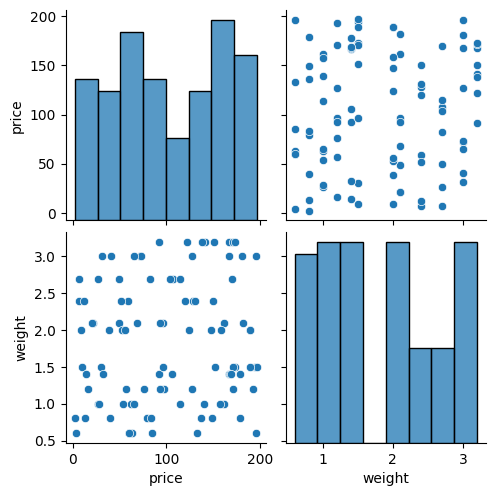

In [96]:
#============== EJERCICIO 7 ==================== 

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(data_dict["products"])
df["price"] = df["price"].str.replace("$", "", regex=False).astype('float64')
# Crear el Pairplot
sns.pairplot(df)

# Mostrar la gráfica
plt.show()